## Chapter 14: Tree-based learners

# 14.6 Ensembling and Random Forests

Ensembling via *bagging* (as detailed in Section 11.5) entails combining sets of cross-validated models to produce a single model with better overall performance. In the context of tree-based universal approximators such an ensemble of purely tree-based models is often referred to as a *random forest*. Each tree in the random forest is a cross-validated regression or classification tree (as detailed in Sections 14.2 and 14.3) or boosted model (typically using stumps, as detailed in Section 14.5), with each built using a different partition of the training data as detailed in Section 11.5 (by convention with tree-based ensembling sampling is done *with replacement*).  This sort of ensembling is almost always used with regression and classification trees to counteract the use of cheap but coursely resolved cross-validation (like e.g., early stopping, as detailed in Section 14.4).   

In [ ]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
 
# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# plotting
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

Below we show an ensembling of $5$ classification trees on a simple two-class dataset, each cross-validated via early-stopping (see Section 14.4) using a different split of the data.  Each of the $5$ splits are illustrated in the small panels on the left, with the validation data points in each highlighted with a yellow boundary, and the decision boundary provided by each trained model shown as well.  Several of these individual trees overfit the data, however their ensemble (shown in the large panel on the right with the original dataset) does not.  This ensembled model - as detailed in Section 11.5 - is bulit by taking the *mode* of $5$ classification trees.

<IPython.core.display.Javascript object>


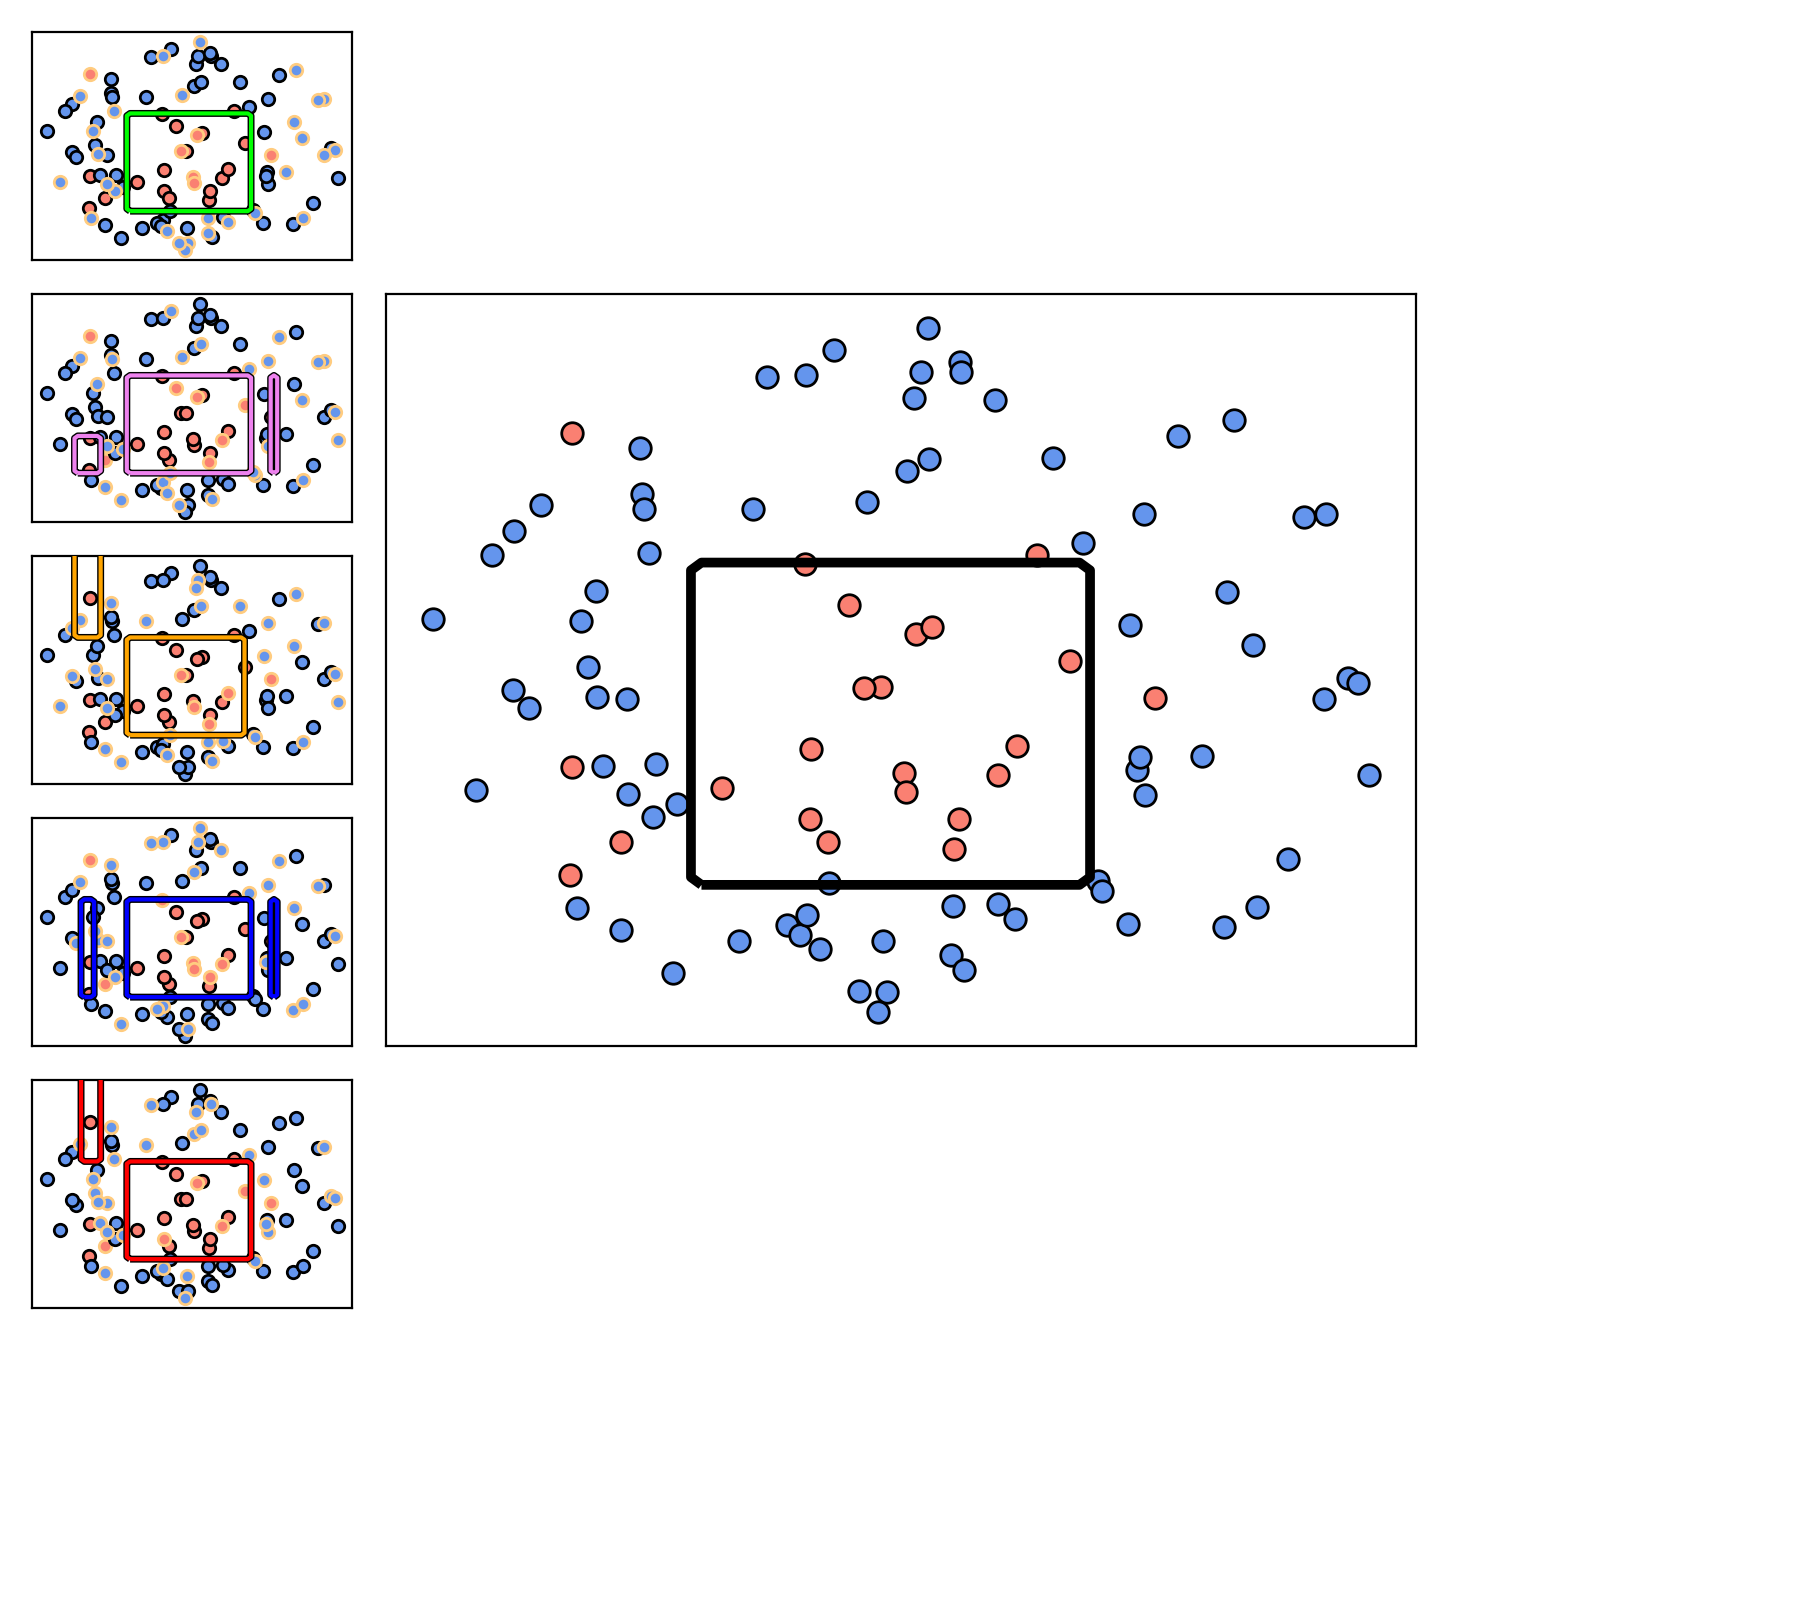

In [5]:
## This code cell will not be shown in the HTML version of this notebook
# path to data, container for trees
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
csvname = datapath + 'new_circle_data.csv'
trees = []
num_trees = 5
depth = 7
train_portion = 0.66

for i in range(num_trees):
    tree = nonlib.recursive_tree_lib_crossval.ClassificationTree.RTree(csvname,depth,train_portion=train_portion)
    trees.append(tree)
    
animator = nonlib.recursive_tree_lib_crossval.classification_ensembler.Visualizer(csvname)
animator.show_runs(trees)